In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, adjusted_rand_score, confusion_matrix
import seaborn as sns

In [3]:
wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
wine_df = pd.DataFrame(X, columns=feature_names)
wine_df['target'] = y

In [4]:
print(f"Dataset shape: {X.shape}")
print(f"Number of classes: {len(np.unique(y))}")
print(f"Class distribution: {pd.Series(y).value_counts().to_dict()}")

Dataset shape: (178, 13)
Number of classes: 3
Class distribution: {1: 71, 0: 59, 2: 48}


In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [7]:
k_values = [2, 3, 4]
kmeans_models = {}
silhouette_scores = {}

for k in k_values:
    # Fit K-Means
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(X_scaled)
    
    # Store model and predictions
    kmeans_models[k] = kmeans
    
    # 4. Evaluation - Calculate silhouette score
    silhouette_avg = silhouette_score(X_scaled, clusters)
    silhouette_scores[k] = silhouette_avg
    
    print(f"For k={k}, silhouette score: {silhouette_avg:.3f}")
    
    # Calculate and print ARI score (comparison with true labels)
    ari_score = adjusted_rand_score(y, clusters)
    print(f"For k={k}, Adjusted Rand Index: {ari_score:.3f}")
    
    # Create confusion matrix to compare clusters with true labels
    cm = confusion_matrix(y, clusters)
    print(f"Confusion matrix for k={k}:")
    print(cm)
    print("\n")
    
# Find the best k based on silhouette score
best_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Best k based on silhouette score: {best_k}")

c:\Users\nhrid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For k=2, silhouette score: 0.259
For k=2, Adjusted Rand Index: 0.374
Confusion matrix for k=2:
[[59  0  0]
 [28 43  0]
 [ 0 48  0]]




c:\Users\nhrid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For k=3, silhouette score: 0.285
For k=3, Adjusted Rand Index: 0.897
Confusion matrix for k=3:
[[ 0  0 59]
 [65  3  3]
 [ 0 48  0]]




c:\Users\nhrid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For k=4, silhouette score: 0.260
For k=4, Adjusted Rand Index: 0.765
Confusion matrix for k=4:
[[ 0 55  0  4]
 [ 1  0 45 25]
 [48  0  0  0]
 [ 0  0  0  0]]


Best k based on silhouette score: 3


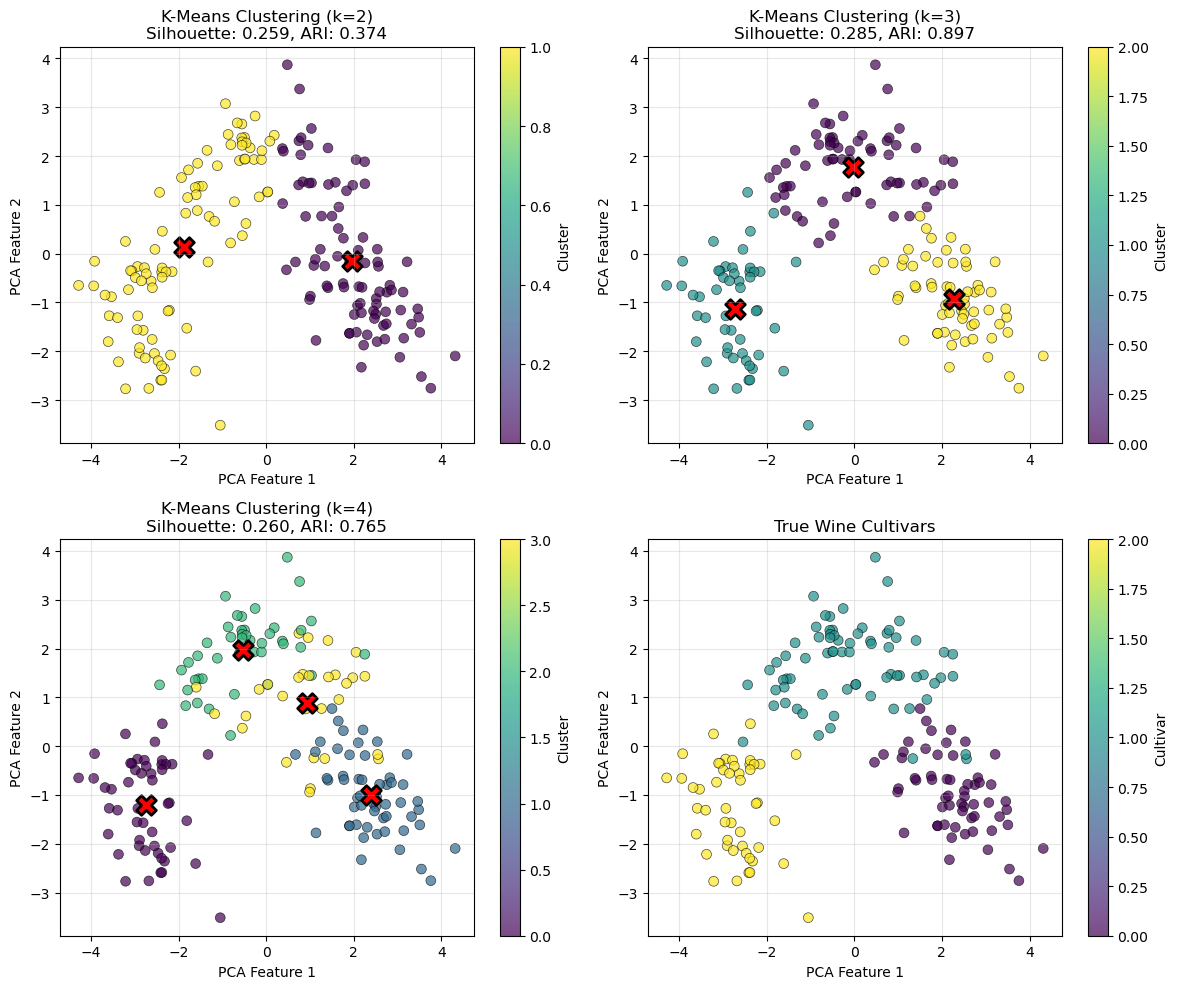

In [8]:
# 5. Visualization using PCA
# Reduce to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot the results for the best k
plt.figure(figsize=(12, 10))

# Plot for each k value
for i, k in enumerate(k_values):
    plt.subplot(2, 2, i+1)
    clusters = kmeans_models[k].predict(X_scaled)
    
    # Scatter plot of points
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', 
                         alpha=0.7, s=50, edgecolor='k', linewidth=0.5)
    
    # Plot centroids
    centroids_pca = pca.transform(kmeans_models[k].cluster_centers_)
    plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], c='red', marker='X', s=200, 
                edgecolor='k', linewidth=2)
    
    plt.title(f'K-Means Clustering (k={k})\nSilhouette: {silhouette_scores[k]:.3f}, '
              f'ARI: {adjusted_rand_score(y, clusters):.3f}')
    plt.xlabel('PCA Feature 1')
    plt.ylabel('PCA Feature 2')
    plt.colorbar(scatter, label='Cluster')
    plt.grid(alpha=0.3)

# Plot the true labels
plt.subplot(2, 2, 4)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', 
                     alpha=0.7, s=50, edgecolor='k', linewidth=0.5)
plt.title('True Wine Cultivars')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(scatter, label='Cultivar')
plt.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('wine_clustering.png', dpi=300, bbox_inches='tight')
plt.show()


Cluster distribution vs. true labels:
Predicted Cluster   0   1   2
True Label                   
0                   0   0  59
1                  65   3   3
2                   0  48   0


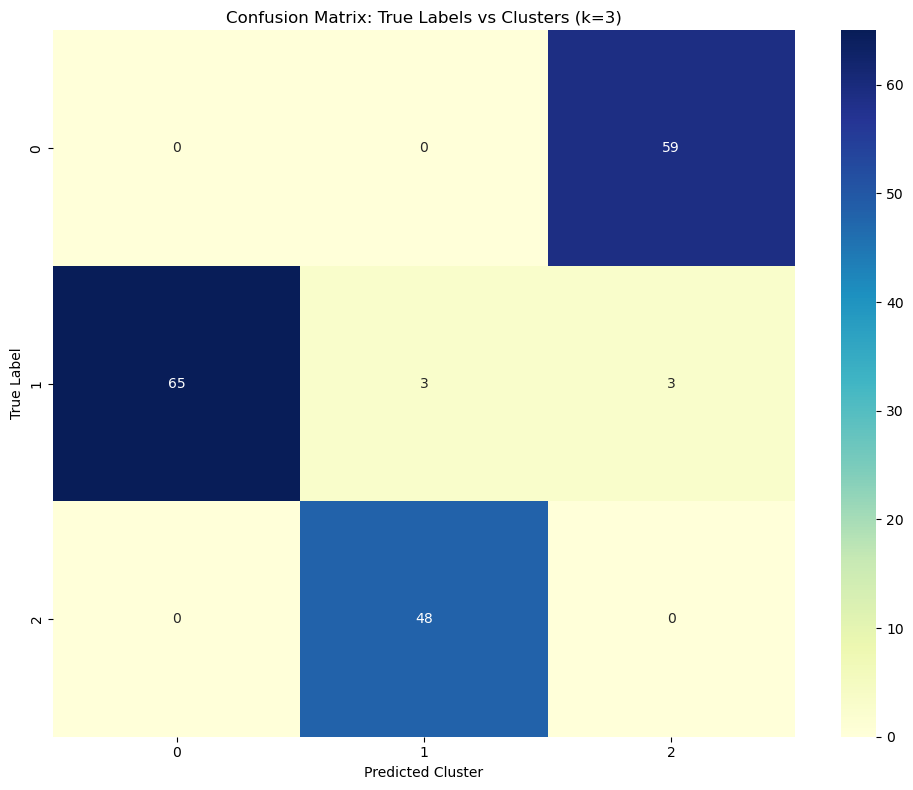

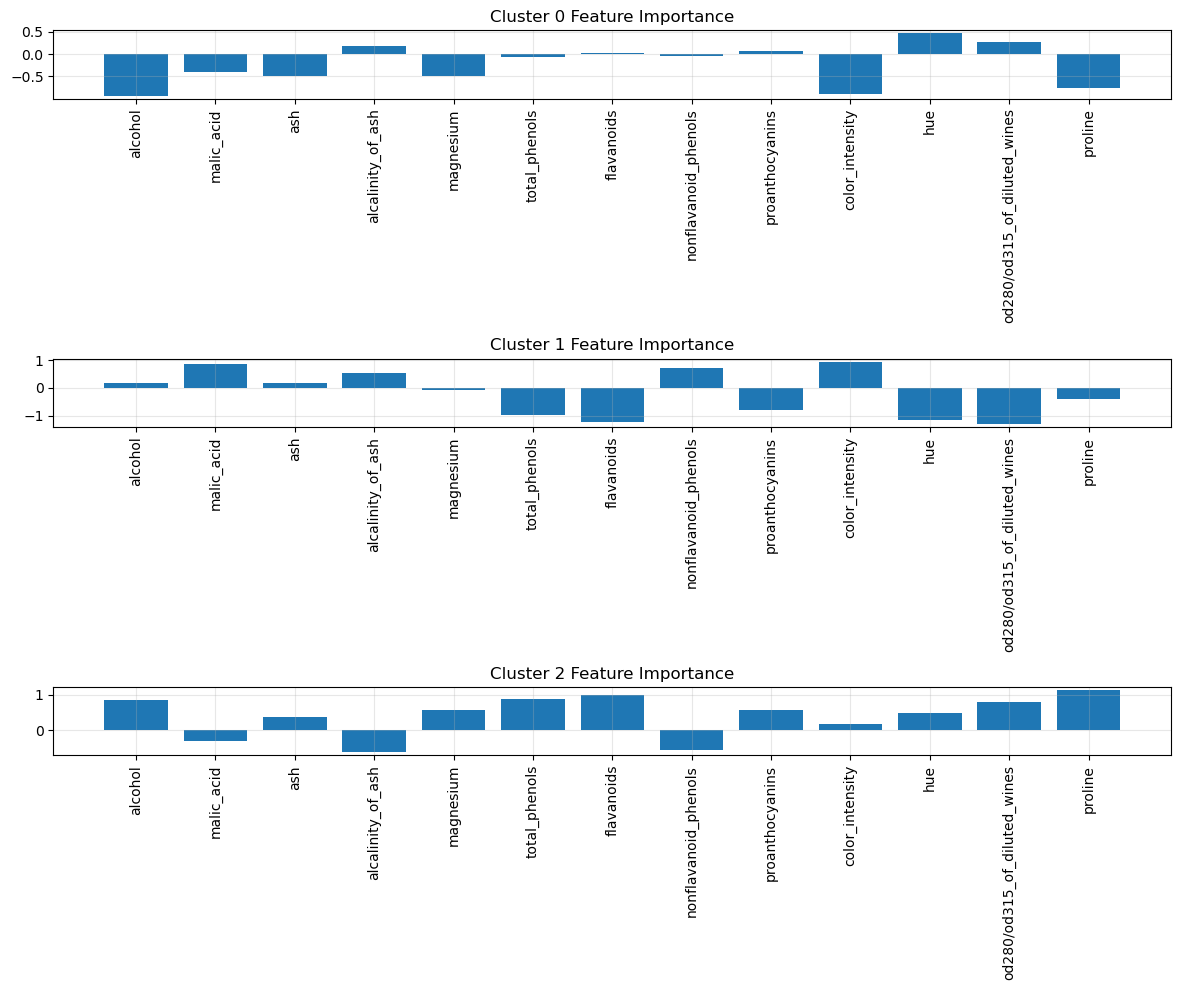

c:\Users\nhrid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nhrid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nhrid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\nhrid\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Window

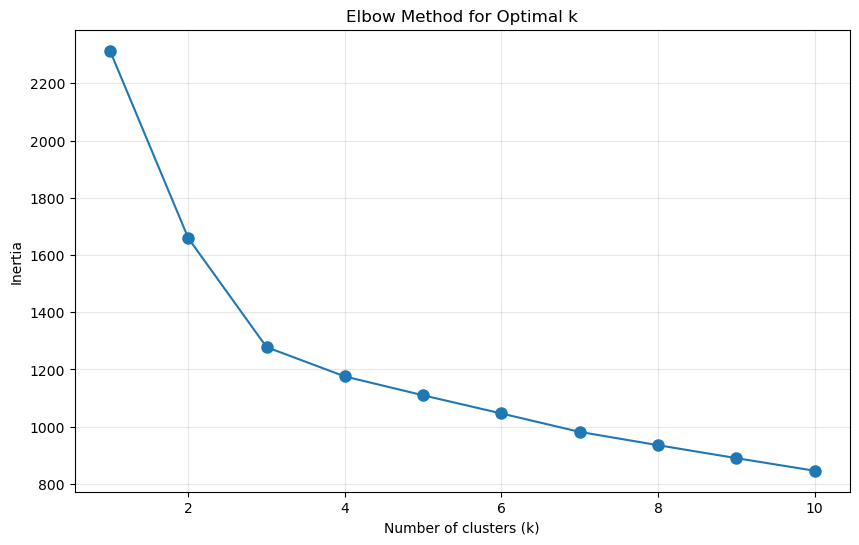

In [9]:
# 6. Detailed comparison with true labels for the best k value
best_clusters = kmeans_models[best_k].predict(X_scaled)

# Create a DataFrame to see the relationship between clusters and true labels
comparison_df = pd.DataFrame({
    'True Label': y,
    f'Cluster (k={best_k})': best_clusters
})

# Create a cross-tabulation to see the relationship
cross_tab = pd.crosstab(
    comparison_df['True Label'], 
    comparison_df[f'Cluster (k={best_k})'],
    rownames=['True Label'],
    colnames=['Predicted Cluster']
)

print("\nCluster distribution vs. true labels:")
print(cross_tab)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt='d')
plt.title(f'Confusion Matrix: True Labels vs Clusters (k={best_k})')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Feature importance analysis for the best k
best_kmeans = kmeans_models[best_k]
centers = best_kmeans.cluster_centers_

# Plot feature importance per cluster
plt.figure(figsize=(12, 10))
for i in range(best_k):
    plt.subplot(best_k, 1, i+1)
    plt.bar(feature_names, centers[i])
    plt.title(f'Cluster {i} Feature Importance')
    plt.xticks(rotation=90)
    plt.grid(alpha=0.3)
    
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

# Calculate the optimal number of clusters using the Elbow Method
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia, 'o-', markersize=8)
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(alpha=0.3)
plt.savefig('elbow_method.png', dpi=300, bbox_inches='tight')
plt.show()